In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import math
from scipy import stats

sb.set() # set the default Seaborn style for graphics

# Initial Exploratory Data Analysis
Taking a look at our data parameters and what we can do with it to tackle our problems

In [2]:
twitchdata = pd.read_csv('test_data2.csv')
twitchdata.describe()

,id,user_id,game_id,viewer_count,follow_count,total_views
count,2.249800e+04,2.249800e+04,2.217000e+04,22498.000000,2.249800e+04,2.249800e+04
mean,4.457011e+10,2.778053e+08,9.916903e+07,399.233621,5.675228e+04,3.119751e+06
std,2.250975e+09,2.341796e+08,3.614630e+08,3887.617151,4.202539e+05,2.289098e+07
min,3.926852e+10,1.040600e+04,2.070000e+02,8.000000,0.000000e+00,0.000000e+00
25%,4.514331e+10,8.689367e+07,3.298200e+04,24.000000,1.282000e+03,2.396100e+04
50%,4.516681e+10,1.711871e+08,4.970570e+05,42.000000,4.369500e+03,1.023455e+05
75%,4.607995e+10,4.864919e+08,5.127090e+05,104.000000,1.700075e+04,5.201175e+05
max,4.610372e+10,7.862522e+08,2.143824e+09,272883.000000,1.753082e+07,7.602435e+08


In [3]:
twitchdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22498 non-null  int64  
 1   user_id        22498 non-null  int64  
 2   user_login     22498 non-null  object 
 3   user_name      22498 non-null  object 
 4   game_id        22170 non-null  float64
 5   game_name      22195 non-null  object 
 6   type           22498 non-null  object 
 7   title          22375 non-null  object 
 8   viewer_count   22498 non-null  int64  
 9   started_at     22498 non-null  object 
 10  language       22498 non-null  object 
 11  thumbnail_url  22498 non-null  object 
 12  tag_ids        22491 non-null  object 
 13  is_mature      22498 non-null  bool   
 14  follow_count   22498 non-null  int64  
 15  total_views    22498 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 2.6+ MB


In [4]:
twitchdata.head()

,id,user_id,user_login,user_name,game_id,game_name,type,title,viewer_count,started_at,language,thumbnail_url,tag_ids,is_mature,follow_count,total_views
0,45141548204,27115917,kamet0,Kamet0,509658.0,Just Chatting,live,REDDIT WAR | ON FAIT LA GUERRE SUR LE R/PLACE ...,272883,2022-04-04T10:20:45Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,['6f655045-9989-4ef7-8f85-1edcec42d648'],False,1230588,102061711
1,46069421021,83232866,ibai,ibai,509658.0,Just Chatting,live,GUERRA EN REDDIT | ÚLTIMO DÍA | HOY SE DECIDE ...,251355,2022-04-04T13:41:21Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,9770181,350406048
2,46069834125,459331509,auronplay,auronplay,509658.0,Just Chatting,live,GUERRA EN REDDIT? Y POR QUÉ NO NOS BESAMOS? NO...,165692,2022-04-04T14:47:47Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,12255320,256207080
3,45142671692,622498423,otplol_,otplol_,21779.0,League of Legends,live,EUM PLAY-IN - KCORP / VIT EN DUPLEX - JOUR 1 -...,89981,2022-04-04T14:30:12Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,"['6f655045-9989-4ef7-8f85-1edcec42d648', '36a8...",False,505006,96518958
4,46069561085,39426641,evelone192,Evelone192,509658.0,Just Chatting,live,Pixel battle Freak,42746,2022-04-04T14:03:28Z,ru,https://static-cdn.jtvnw.net/previews-ttv/live...,['0569b171-2a2b-476e-a596-5bdfb45a1327'],False,2085936,98111163


<Figure size 1728x1728 with 0 Axes>

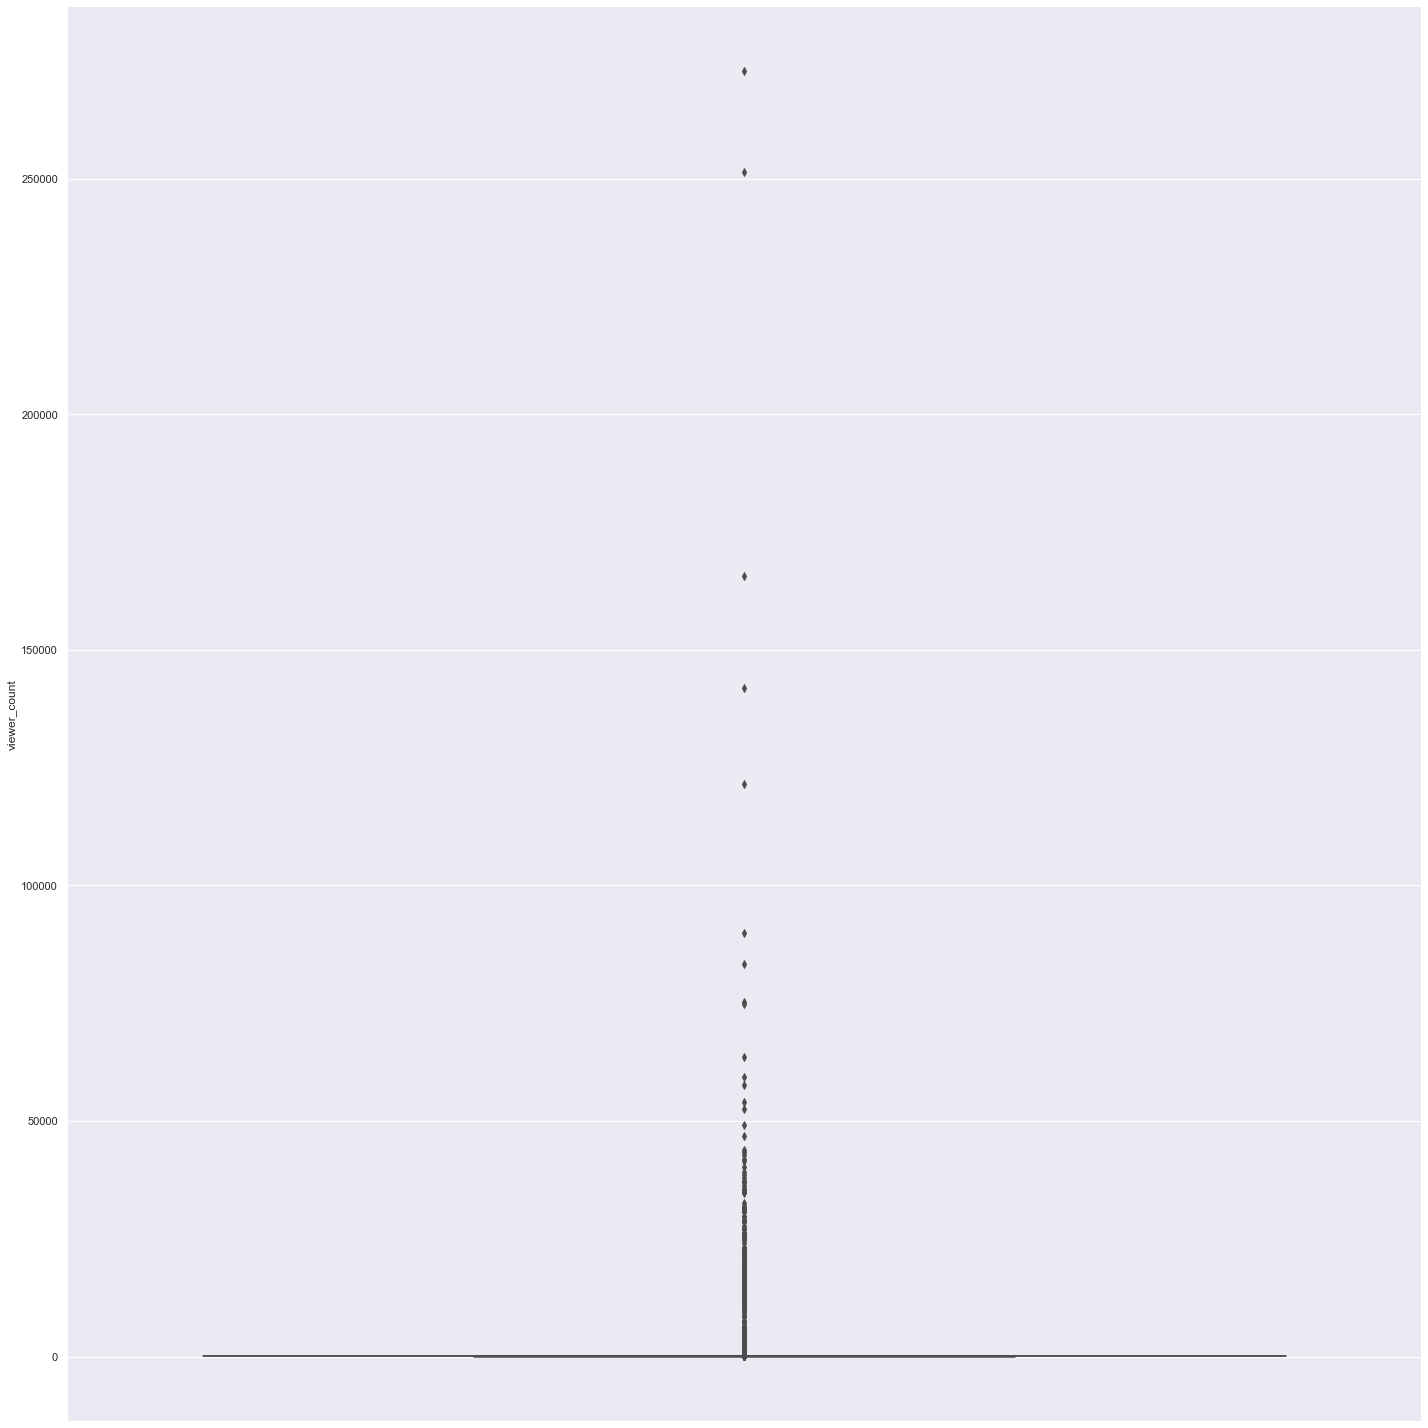

In [23]:
f = plt.figure(figsize=(24, 24))
sb.catplot(y = 'viewer_count', data = twitchdata, height = 20, kind = 'box')

From this boxplot, we can tell that 75% of the data lies around the 0 number, thus there is a need to clean outliers.

# Start plotting with our numeric predictors

We start by looking to see the relationship between active viewer count (viewer_count) and total views of the channels (total_views) as well as the follow count of the channels (follow_count)

In [6]:
# Numeric Predictors are 'total_views','follow_count'
twitchdata[['total_views','follow_count']].describe()

,total_views,follow_count
count,2.249800e+04,2.249800e+04
mean,3.119751e+06,5.675228e+04
std,2.289098e+07,4.202539e+05
min,0.000000e+00,0.000000e+00
25%,2.396100e+04,1.282000e+03
50%,1.023455e+05,4.369500e+03
75%,5.201175e+05,1.700075e+04
max,7.602435e+08,1.753082e+07


<AxesSubplot:>

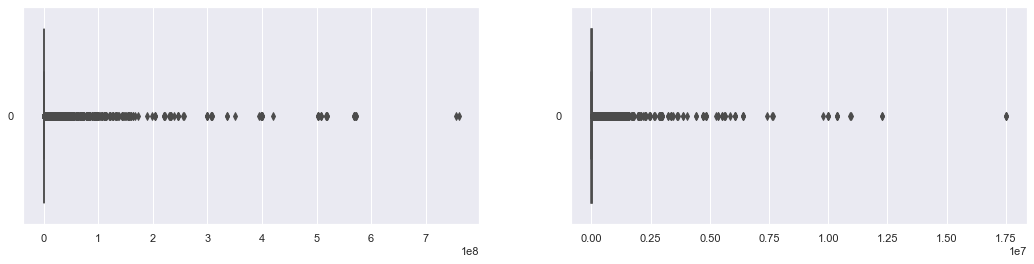

In [8]:
# Numeric Predictors plots
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = twitchdata['total_views'], orient = "h", ax = axes[0])
sb.boxplot(data = twitchdata['follow_count'], orient = 'h', ax = axes[1])

<AxesSubplot:xlabel='follow_count', ylabel='viewer_count'>

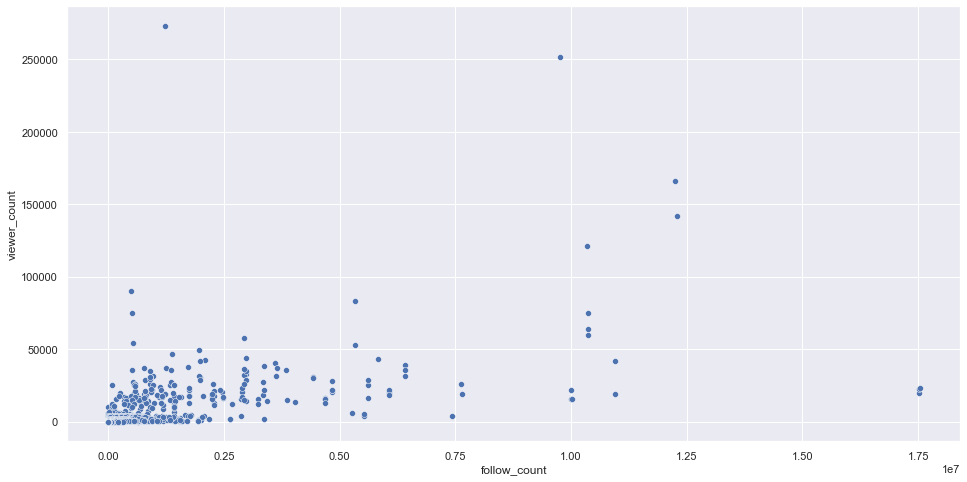

In [10]:
# Follow count vs Active Viewer Count
f = plt.figure(figsize = (16,8))
sb.scatterplot(x = 'follow_count', y = 'viewer_count', data = twitchdata)

<AxesSubplot:xlabel='total_views', ylabel='viewer_count'>

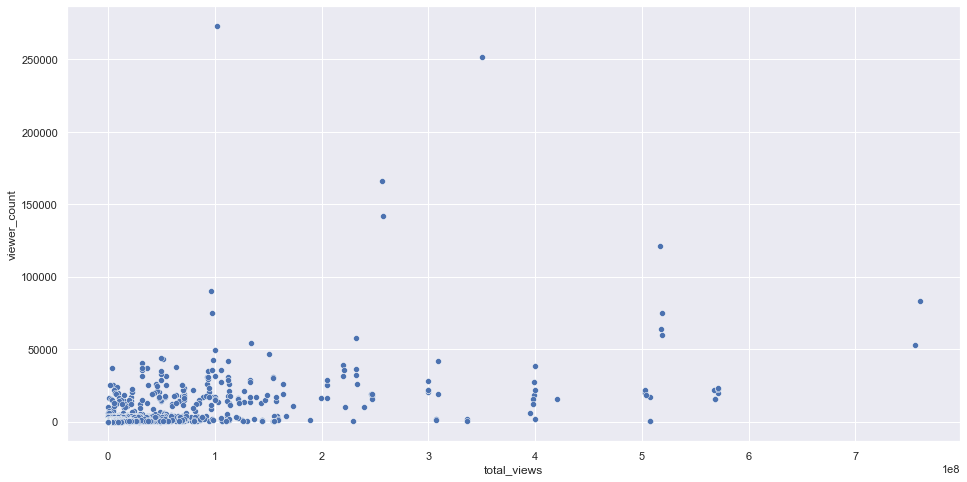

In [13]:
f = plt.figure(figsize = (16,8))
sb.scatterplot(x = 'total_views', y = 'viewer_count', data = twitchdata)

From the scatterplots above, we can see that the majority of the data scrapped is congregated at the bottom left of the graph. This means that we need to clean the data in order to get meaningful insights


# Correlation
Looking at the correlation matrix before we clean the data for numeric predictors, we see that the correlation between viewer_count and follow + total views is alright

              viewer_count  follow_count  total_views
viewer_count      1.000000      0.591279     0.518855
follow_count      0.591279      1.000000     0.793644
total_views       0.518855      0.793644     1.000000


<AxesSubplot:>

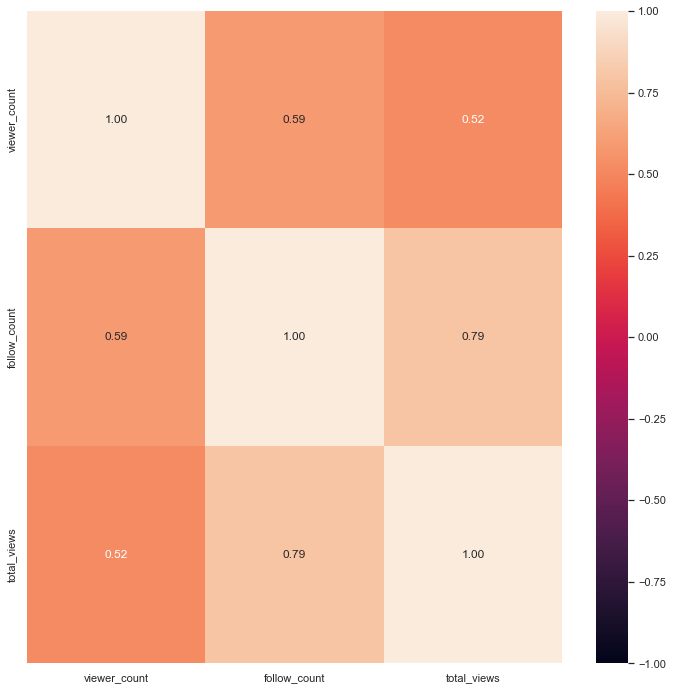

In [27]:
twitch_num = pd.DataFrame(twitchdata[['viewer_count', 'follow_count', 'total_views']])
print(twitch_num.corr())

# Heatmap of numeric correlation
f = plt.figure(figsize=(12, 12))
sb.heatmap(twitch_num.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

# Cleaning the data of outliers
In order to gain more insightful observations, we will attempt to get rid of the outliers using the IQR method

### First we need to fill up the columns as some of them are not filled up properly

In [37]:
twitchdata_clean = twitchdata.copy()
twitchdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22498 non-null  int64  
 1   user_id        22498 non-null  int64  
 2   user_login     22498 non-null  object 
 3   user_name      22498 non-null  object 
 4   game_id        22170 non-null  float64
 5   game_name      22195 non-null  object 
 6   type           22498 non-null  object 
 7   title          22375 non-null  object 
 8   viewer_count   22498 non-null  int64  
 9   started_at     22498 non-null  object 
 10  language       22498 non-null  object 
 11  thumbnail_url  22498 non-null  object 
 12  tag_ids        22491 non-null  object 
 13  is_mature      22498 non-null  bool   
 14  follow_count   22498 non-null  int64  
 15  total_views    22498 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 2.6+ MB


### Because there are some data points whose columns are not filled properly, we need to fill it properly in order to do analysis properly

In [33]:
twitchdata_clean['game_id'].fillna(value = '0', inplace = True)
twitchdata_clean['game_name'].fillna(value = 'Invalid', inplace = True)
twitchdata_clean['title'].fillna(value = "No Title", inplace = True)
twitchdata_clean['tag_ids'].fillna(value = 'No Tags', inplace = True)

In [36]:
twitchdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             22498 non-null  int64 
 1   user_id        22498 non-null  int64 
 2   user_login     22498 non-null  object
 3   user_name      22498 non-null  object
 4   game_id        22498 non-null  object
 5   game_name      22498 non-null  object
 6   type           22498 non-null  object
 7   title          22498 non-null  object
 8   viewer_count   22498 non-null  int64 
 9   started_at     22498 non-null  object
 10  language       22498 non-null  object
 11  thumbnail_url  22498 non-null  object
 12  tag_ids        22498 non-null  object
 13  is_mature      22498 non-null  bool  
 14  follow_count   22498 non-null  int64 
 15  total_views    22498 non-null  int64 
dtypes: bool(1), int64(5), object(10)
memory usage: 2.6+ MB


In [144]:
# Import Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

#### Before cleaning the data, lets see the linear regression when it still has outliers

Intercept 	: b =  [87.75238183]
Coefficients 	: a =  [[0.00545439]]


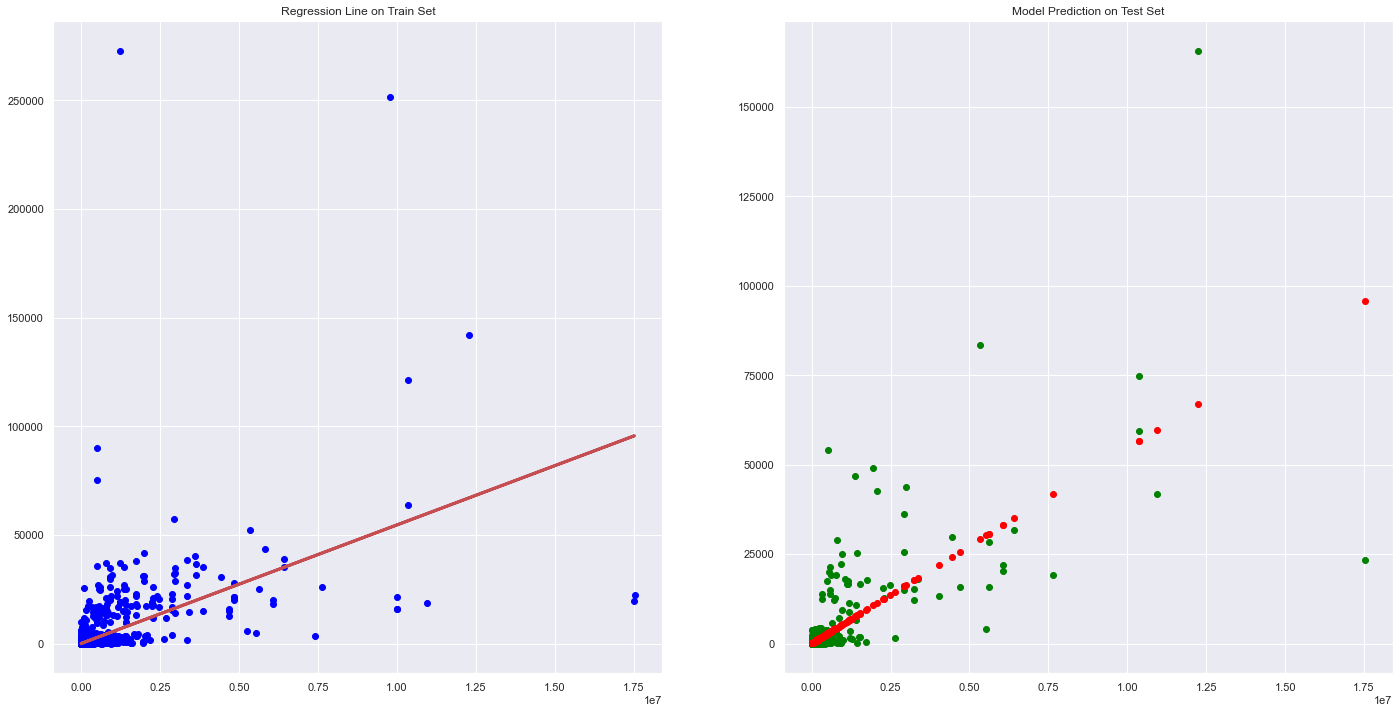

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2981982108432233
Mean Squared Error (MSE) 	: 10413016.856506605

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5375675051192826
Mean Squared Error (MSE) 	: 7494696.742566718



In [54]:
univariateLinearRegression(Xvar = "follow_count", yvar = "viewer_count", df = twitchdata_clean)

### Now we will attempt to clean outliers between viewer_count and follow_count to try linear regression

In [111]:
targetData = twitchdata_clean[['viewer_count', 'follow_count']].copy()

In [112]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

viewer_count    3002
follow_count    3237
dtype: int64

In [113]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule toaidentify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,viewer_count,follow_count
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
22493,False,False
22494,False,False
22495,False,False
22496,False,False


In [114]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# How many points are outliers for the two variables combined?
print(outliers.value_counts())

False    18174
True      4324
dtype: int64


In [115]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            21869, 22048, 22060, 22069, 22245, 22259, 22274, 22392, 22453,
            22474],
           dtype='int64', length=4324)

In [116]:
# Remove the outliers based on the row indices obtained above
targetData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData = targetData.reset_index(drop = True)
print(targetData)

       viewer_count  follow_count
0               218           567
1               218         10467
2               218          6042
3               217         22535
4               217          9258
...             ...           ...
18169            18          3409
18170            18          2339
18171            18            16
18172            18          1944
18173            17          1456

[18174 rows x 2 columns]


#### Now we will be doing linear regression with the cleaned data

Intercept 	: b =  [37.47779163]
Coefficients 	: a =  [[0.00201397]]


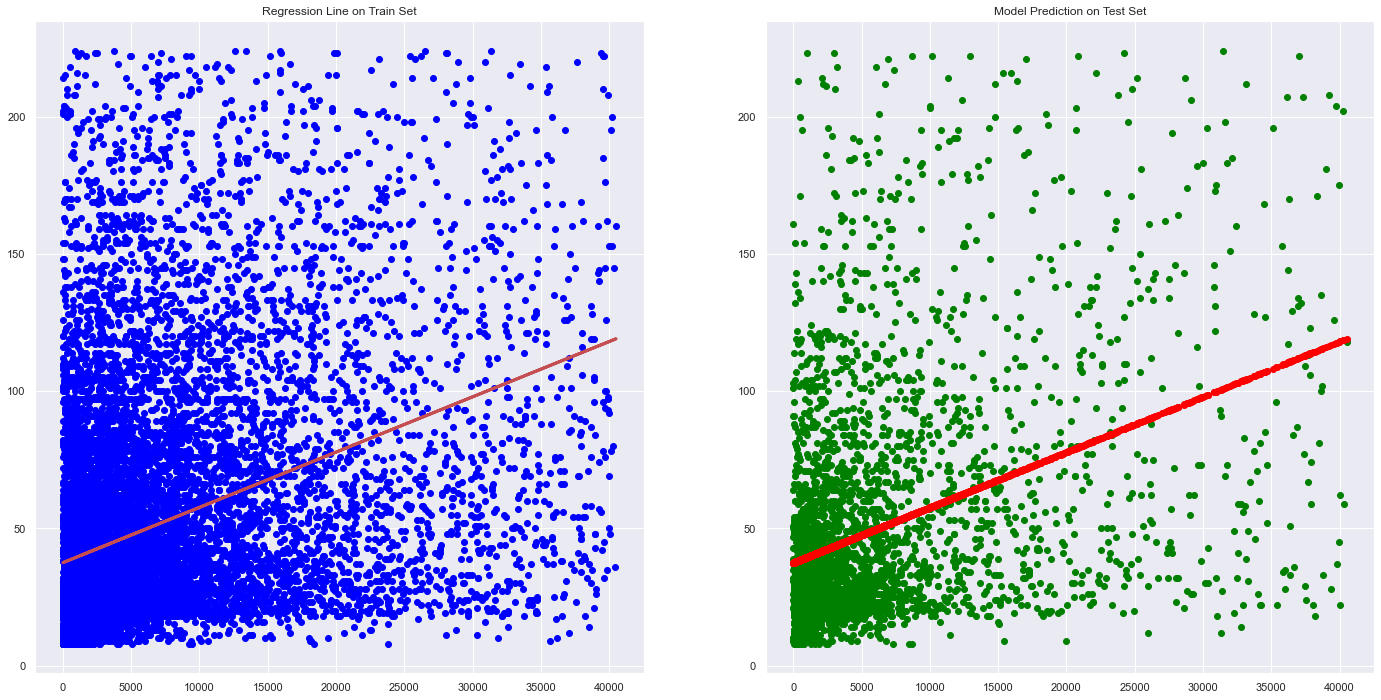

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.14412125265691555
Mean Squared Error (MSE) 	: 1516.5001931805282

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.16623575014747172
Mean Squared Error (MSE) 	: 1466.4556331916522



In [117]:
univariateLinearRegression(Xvar = "follow_count", yvar = "viewer_count", df = targetData)

### Conclusion

We are unable to draw any meaningful conclusion from the linear regression as we can see in the graphs above. We will try to do it with cleaned data with total views instead

In [137]:
targetData2 = twitchdata_clean[['viewer_count', 'total_views']].copy()
targetData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   viewer_count  22498 non-null  int64
 1   total_views   22498 non-null  int64
dtypes: int64(2)
memory usage: 351.7 KB


In [138]:
# Calculate the quartiles
Q1 = targetData2.quantile(0.25)
Q3 = targetData2.quantile(0.75)

# Rule to identify outliers
rule = ((targetData2 < (Q1 - 1.5 * (Q3 - Q1))) | (targetData2 > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

viewer_count    3002
total_views     3731
dtype: int64

In [139]:
# Calculate the quartiles
Q1 = targetData2.quantile(0.25)
Q3 = targetData2.quantile(0.75)

# Rule toaidentify outliers
rule = ((targetData2 < (Q1 - 1.5 * (Q3 - Q1))) | (targetData2 > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,viewer_count,total_views
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
22493,False,False
22494,False,False
22495,False,False
22496,False,False


In [140]:
# Find the rows where ANY column is True
outliers2 = rule.any(axis = 1)   # axis 0 is row, 1 is column

# How many points are outliers for the two variables combined?
print(outliers2.value_counts())

False    17787
True      4711
dtype: int64


In [141]:
# Which row indices correspond to outliers in the dataframe?
outlierindices2 = outliers2.index[outliers2 == True]
outlierindices2

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            22245, 22259, 22263, 22274, 22305, 22315, 22316, 22357, 22417,
            22474],
           dtype='int64', length=4711)

In [142]:
# Remove the outliers based on the row indices obtained above
targetData2.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices2, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData2 = targetData2.reset_index(drop = True)
print(targetData2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17787 entries, 0 to 17786
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   viewer_count  17787 non-null  int64
 1   total_views   17787 non-null  int64
dtypes: int64(2)
memory usage: 278.0 KB
None


Intercept 	: b =  [39.57947611]
Coefficients 	: a =  [[6.01976984e-05]]


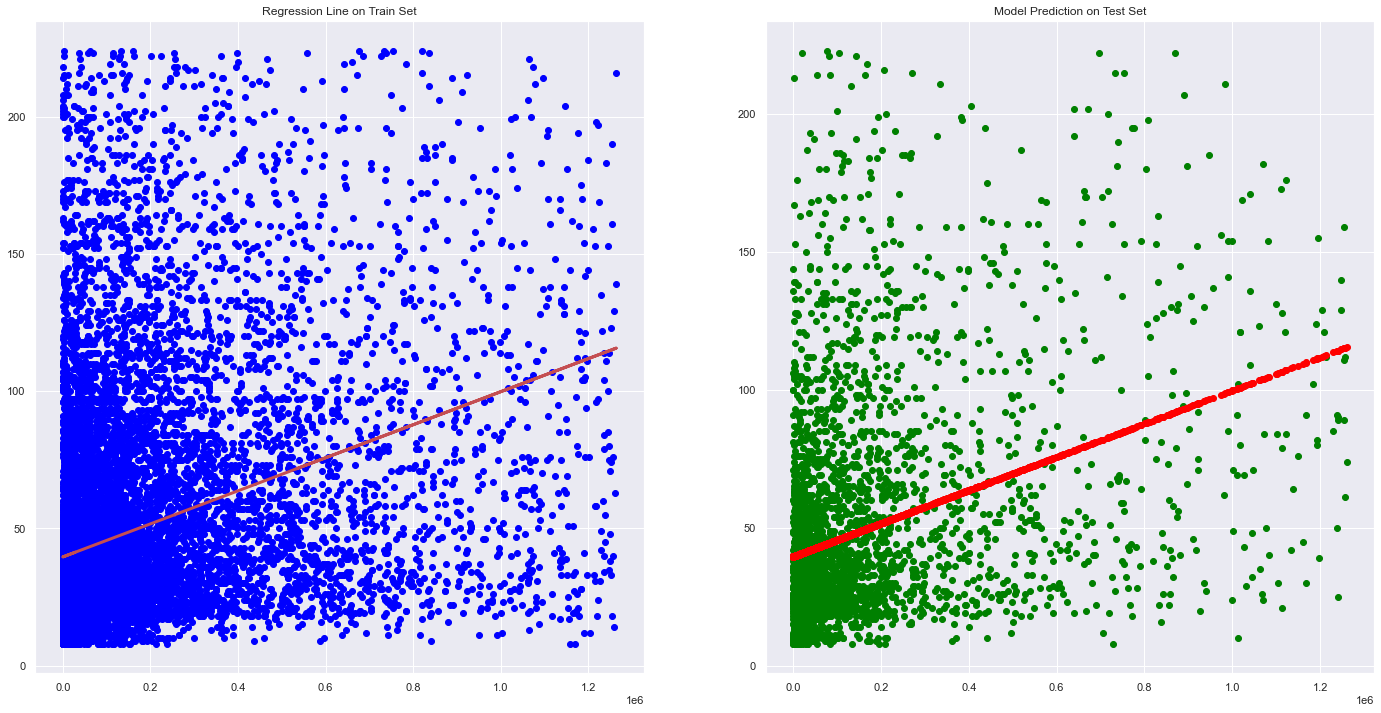

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11510323547708956
Mean Squared Error (MSE) 	: 1515.8314812499914

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1440221255448486
Mean Squared Error (MSE) 	: 1380.6623554309335



In [145]:
univariateLinearRegression(Xvar = "total_views", yvar = "viewer_count", df = targetData2)

### Conclusion
Although our initial assumption for both follow_count and total_views to be strongly related with active viewer count, after doing linear regression, we find that our assumptions are wrong.

## Multi-variate Linear Regression
We will attempt one final time to find meaningful data by combining follow_count and total_views into a multi-variate linear regression

In [163]:
multiData = twitchdata_clean[['viewer_count','follow_count','total_views']].copy()
multiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   viewer_count  22498 non-null  int64
 1   follow_count  22498 non-null  int64
 2   total_views   22498 non-null  int64
dtypes: int64(3)
memory usage: 527.4 KB


In [164]:
# Calculate the quartiles
Q1 = multiData.quantile(0.25)
Q3 = multiData.quantile(0.75)

# Rule to identify outliers
mRule = ((multiData < (Q1 - 1.5 * (Q3 - Q1))) | (multiData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
mRule.sum()

viewer_count    3002
follow_count    3237
total_views     3731
dtype: int64

In [165]:
# Calculate the quartiles
Q1 = multiData.quantile(0.25)
Q3 = multiData.quantile(0.75)

# Rule to identify outliers
mRule = ((multiData < (Q1 - 1.5 * (Q3 - Q1))) | (multiData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
mRule

,viewer_count,follow_count,total_views
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
22493,False,False,False
22494,False,False,False
22495,False,False,False
22496,False,False,False


In [166]:
# Find the rows where ANY column is True
mOutliers = mRule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
mOutliers

0         True
1         True
2         True
3         True
4         True
         ...  
22493    False
22494    False
22495    False
22496    False
22497    False
Length: 22498, dtype: bool

In [167]:
# Which row indices correspond to outliers in the dataframe?
mOutlierindices = mOutliers.index[mOutliers == True]
mOutlierindices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            22263, 22274, 22305, 22315, 22316, 22357, 22392, 22417, 22453,
            22474],
           dtype='int64', length=5120)

In [168]:
# Remove the outliers based on the row indices obtained above
multiData.drop(axis = 0,               # 0 drops row 1 drops column
                index = mOutlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
multiData.info()
print(multiData)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17378 entries, 425 to 22497
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   viewer_count  17378 non-null  int64
 1   follow_count  17378 non-null  int64
 2   total_views   17378 non-null  int64
dtypes: int64(3)
memory usage: 543.1 KB
       viewer_count  follow_count  total_views
425             218           567         1514
427             218         10467       253554
428             218          6042       396508
431             217          7361       473296
434             216         15361       136025
...             ...           ...          ...
22493            18          3409       231596
22494            18          2339        36948
22495            18            16           83
22496            18          1944        29721
22497            17          1456        33105

[17378 rows x 3 columns]


Intercept of Regression 	: b =  [35.56767397]
Coefficients of Regression 	: a =  [[1.47114077e-03 2.81862133e-05]]

     Predictors  Coefficients
0  follow_count      0.001471
1   total_views      0.000028



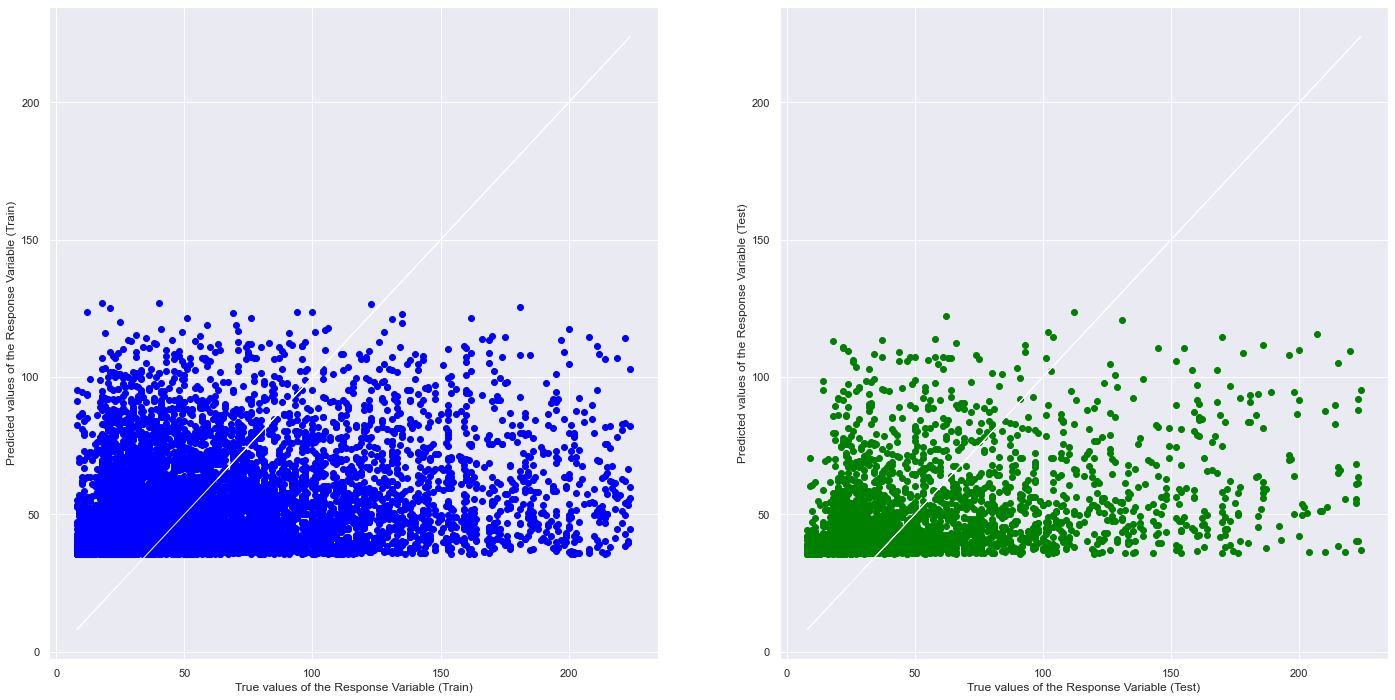

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1400918057988929
Mean Squared Error (MSE) 	: 1381.5441320120121

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15145313545132688
Mean Squared Error (MSE) 	: 1451.7530380963408



In [171]:
#Multi-variate LR

y = pd.DataFrame(multiData['viewer_count'])
X = pd.DataFrame(multiData[['follow_count','total_views']])

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Conclusion
Even with multi-variate linear regression with our numeric predictors, we are unable to find any meaningful links between the images we have seen other than that the explained variance is low.

In [101]:
# Categorical Predictors are 'game_name','language','is_mature'
twitchdata[['game_name','language','is_mature']].describe()

,game_name,language,is_mature
count,22195,22498,22498
unique,1401,33,2
top,Just Chatting,en,False
freq,2411,10882,13995


False    13995
True      8503
Name: is_mature, dtype: int64


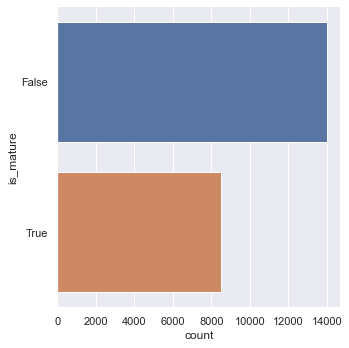

In [102]:
# Is_mature categorical data
print(twitchdata["is_mature"].value_counts())
sb.catplot(y = "is_mature", data = twitchdata, kind = "count")